# LDA(Linear Discriminant Analysis)

* 선형 판별 분석법, PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소.

* PCA는 입력 데이터의 변동성이 가장 큰 축. LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는다.

* LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해서 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
> => 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게

### LDA 수행 과정
1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구한다.

2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb => 고유 벡터로 분해

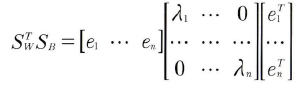

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출한다.

4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 붓꽃 데이터 세트에 LDA 적용

사이킷런의 LDA -> LinearDiscriminantAnalysis

붓꽃 데이터 세트를 로드한 후 표준 정규 분포로 스케일링.

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 붓꽃 데이터를 LDA 변환한다. PCA와 다르게 LDA는 비지도 학습이 아닌 지도 학습이다. 즉, 클래스의 결정값이 변환 시에 필요하다.

lad객체의 fit() 메서드를 호출할 때 결정값을 입력해야한다.

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


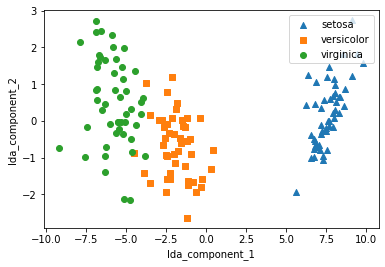

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()